In [31]:
import matplotlib.pyplot as plt
plt.style.use('../styles/gcpeixoto-book.mplstyle')

(cap:bissecao)=
# Método da Bisseção: A Arte de Cindir e Convergir

<div class="chapter-thumb">
    <div class="chapter-oa">
        <h2>Objetivos de aprendizagem</h2>
        <ul>
        <li>Compreender o funcionamento do método da bisseção, seu algoritmo e as condições necessárias para sua aplicação;</li>
	    <li>Aplicar o método da bisseção na resolução de equações não lineares;</li>
	    <li>Analisar o comportamento da convergência do método da bisseção, sua precisão e limitações.</li>	    
        </ul>
    </div>        
    <div class="quote-box">
        <p><em>"Divide et impera." (Júlio César)
        </p></em>
    </div>        
</div>


O método da bisseção (MB) é uma das técnicas mais fundamentais para busca de raízes de equações não-lineares. Robusto e de fácil implementação, ele está estruturado sobre o _Teorema do Valor Intermediário_, que afirma que se uma função contínua $f(x)$ tem sinais opostos em dois pontos $a$ e $b$, condição que se verifica quando $f(a) f(b) < 0$ é verdadeira, então existe pelo menos uma raiz da função no intervalo $[a, b]$. Em termos simples, o método envolve dividir repetidamente o intervalo ao meio e selecionar o subintervalo onde a raiz deve estar, baseando-se nos sinais de $f$.

O MB tem garantia de convergência, desde que a função seja contínua e o intervalo inicial seja escolhido corretamente. No entanto, a convergência pode ser lenta em comparação com outros métodos, especialmente quando a função tiver múltiplas raízes próximas. Neste capítulo, apresentaremos uma implementação funcional do método da bisseção para equações não-lineares unidimensionais. O algoritmo é capaz de lidar com as principais funções matemáticas da biblioteca `numpy`, possui alguns comandos para checagem de validade e usa a estrutura `while` para o laço do processo iterativo.

```{figure} ../figs/while-ai.png
---
width: 250px
name: fig-whileai
---
```

## Explicação do algoritmo

O algoritmo funciona da seguinte forma: calcula-se o ponto médio do intervalo atual,

$$
c = \frac{a + b}{2},
$$

e avalia-se o sinal de $f(c)$. Se $f(a) f(c) < 0$, a raiz está no intervalo $[a, c]$; caso contrário, está em $[c, b]$. O intervalo é então atualizado, e o processo é repetido até que o tamanho do intervalo $|b - a|$ seja menor que uma tolerância $\epsilon$ definida previamente, ou até que $f(c)$ seja suficientemente próximo de zero.


### Pseudocódigo

Entrada: função f(x), intervalo [a, b], tolerância ε, número máximo de iterações N
Saída: aproximação da raiz ou mensagem de erro

1. Verifique se $f(a)f(b) < 0$ e avance. Se não, lance erro (sem garantia de raiz no intervalo) e pare.

2. Para $k$ de 1 até $N$:

    a. $c \leftarrow (a + b) / 2$ (ponto médio do intervalo)
    
    b. Se $(b - a)/2 < \epsilon$:
         Retorne $c$ como raiz aproximada
    
    c. Se $f(a)f(c) < 0$:
         $b \leftarrow c$
       Senão:
         $a \leftarrow c$

3. Lance mensagem de número máximo de iterações atingido e retorne $c$ como melhor estimativa


## Implementação do algoritmo

No algoritmo proposto abaixo, a função `bissecao` requererá 5 argumentos: 

- a função $f(x)$ propriamente dita, representada por `f`;
- duas estimativas iniciais `a` e `b`, que representam o intervalo de busca da raiz $[a,b]$;
- o erro absoluto desejado $EA_d$, representado por `e`;
- o número máximo de iterações $N$ para tentativa de solução, representado por `N`.

In [32]:
import inspect, re 
import numpy as np
from matplotlib.pyplot import plot
from warnings import warn
from prettytable import PrettyTable as pt

def bissecao(f,a,b,tol,N):
    """Algoritmo para determinação de raízes de equações não lineares 
       unidimensionais pelo método da bisseção.

    Parâmetros: 
        f: string dependendo de uma variável, i.e., a função-alvo
            (e.g., 'x**2 - 1', 'x**2*cos(x)', etc.) 
        a: estimativa inferior
        b: estimativa superior
        tol: erro desejado (tolerância)
        N: número máximo de iterações a repetir

    Retorno: 
        x: aproximação para a raiz da função   
    """
    
    # construtor de tabela
    table = pt()
    
    # substitui expressões da string pelas chamadas das funções do numpy
    f = re.sub('(sin|sinh|cos|cosh|tan|tanh|exp|log|sqrt|log10|arcsin|arccos|arctan|arcsinh|arccosh|arctanh)', r'np.\1', f)
    
    # identifica a variável independente
    var = re.search(r'([a-zA-Z][\w]*) ?([\+\-\/*]|$|\))', f).group(1)
    
    # cria função anônima
    f = eval('lambda ' + var + ' :' + f)
    
    # checa se a função é de uma variável, senão lança erro        
    if len(inspect.getfullargspec(f).args) - 1 > 0:    
        raise ValueError('O código é válido apenas para uma variável.')

    # calcula valor da função nos extremos
    fa = f(a) 
    fb = f(b)
    
    # verifica sinal da função para o intervalo passado     
    if fa*fb >= 0:
        raise ValueError('A função deve ter sinais opostos em a e b!')
    
    # flag usada para marcar caso f(xm) = 0
    done = False;
        
    # no. iterações mínimo
    niter = int(np.ceil(np.log((b-a)/tol)/np.log(2)))
    if N < niter:
        print(f'São necessárias pelo menos {niter} iterações, mas N = {N}.\n')

    
    # cabeçalho de tabela
    table.field_names = ['i','xm','f(xm)','a','b','f(a)','f(b)','EA']

    # bisecta o intervalo
    xm = (a+b)/2
    
    # contador 
    i = 1 
    
    # loop 
    while abs(a-b) > tol and (not done and N != 0):    
        
        # avalia a função no ponto médio
        fxm = f(xm) 
                        
        # adiciona linha de tabela de resultado
        table.add_row([i,np.round(xm,8),np.round(f(xm),8),
                   np.round(a,4),np.round(b,4),
                   np.round(f(a),4),np.round(f(b),4),
                   f'{abs(a-b):e}'])
   
        if fa*fxm < 0:      # Raiz esta à esquerda de xm
            b = xm
            fb = fxm
            xm = (a+b)/2
        elif fxm*fb < 0:    # Raiz esta à direita de xm
            a = xm
            fa = fxm
            xm = (a+b)/2
        else:               # Achamos a raiz
            done = True            
    
        N -= 1              # Atualiza passo
        i += 1              # Atualiza contador
    
    # impressão de tabela
    table.add_row([i,np.round(xm,8),np.round(f(xm),8),
                   np.round(a,4),np.round(b,4),
                   np.round(f(a),4),np.round(f(b),4),
                   f'{abs(a-b):e}'])
    table.align = 'c'; print(table)
    
    return xm

Note que o cerne desta função é o trecho abaixo. O resto do código é constituído de algumas especializações e comandos acessórios.

```python
while abs(a-b) > tol and (not done and N != 0):    
    
    # avalia a função no ponto médio
    fxm = f(xm) 

    if fa*fxm < 0:      # Raiz esta à esquerda de xm
        b = xm
        fb = fxm
        xm = (a+b)/2
    elif fxm*fb < 0:    # Raiz esta à direita de xm
        a = xm
        fa = fxm
        xm = (a+b)/2
    else:               # Achamos a raiz
        done = True            

    N -= 1              # Atualiza passo
    i += 1              # Atualiza contador

## _Playground_ interativo

Utilize o _playground_ interativo abaixo para testar o método da bisseção para funções não lineares quaisquer. Como dado de entrada para $f(x)$, utilize funções escritas nos moldes de Python científico como um tipo `str`. Para os parâmetros do intervalo inicial e de erro, utilize `float`.

In [34]:
import dash, re 
from dash import dcc, html, Input, Output
import numpy as np
import plotly.graph_objects as go
import sympy as sp

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    
    #html.H1("Método da Bisseção (Interativo)"),
    
    # Function input
    
    html.Label("f(x): ",
               style={'display': 'inline-block', 'padding': '5px'}),
    dcc.Input(id="function-input",
              type="text",
              placeholder="Insira f(x)...",
              value="x/(1 - 2*x) - tan(x+1)",
              style={'width': '30%', 'margin-right': '20px'}),
    
    # Interval input
    html.Label("a: ",
               style={'display': 'inline-block', 'padding': '5px'}),
    dcc.Input(id="a-input",
              type="number",
              placeholder="Insira o lim. inf. ...",
              value=4,
              style={'width': '10%', 'margin-right': '20px'}),
    
    html.Label("b: ",
               style={'display': 'inline-block', 'padding': '5px'}),
    dcc.Input(id="b-input",
              type="number",
              placeholder="Insira o lim. sup. ...",
              value=6,
              style={'width': '10%', 'margin-right': '20px'}),
    
    # Tolerance input
   html.Label("eps: ",
               style={'display': 'inline-block', 'padding': '5px'}),
    dcc.Input(id="tol-input",
              type="number",
              placeholder="Insira a tol. ...",
              value=1e-3,
              style={'width': '10%', 'margin-right': '20px'}),
    
    html.Hr(),
    
    # Graph to display the bisection visualization
    dcc.Graph(id="bisection-graph"),
    
    html.Hr(),
    
    # Information about the method
    html.Div(id="info-output")
    
], style={'font-family': 'Inter'})

# Algoritmo da bisseção
def bisection_method(f, a, b, tol=1e-5, max_iter=100):
    
    # substitui expressões da string pelas chamadas das funções do numpy
    f = re.sub('(sin|sinh|cos|cosh|tan|tanh|exp|log|sqrt|log10|arcsin|arccos|arctan|arcsinh|arccosh|arctanh)', r'np.\1', f)
    
    # identifica a variável independente
    var = re.search(r'([a-zA-Z][\w]*) ?([\+\-\/*]|$|\))', f).group(1)
    
    # cria função anônima
    f = eval('lambda ' + var + ' :' + f)
    
    # checa se a função é de uma variável, senão lança erro        
    if len(inspect.getfullargspec(f).args) - 1 > 0:    
        raise ValueError('O código é válido apenas para uma variável.')
    
    if f(a) * f(b) >= 0:
        return None, "sgn( f(a)f(b) ) != -1! Verifique a função e o intervalo"
    
    # Pontos de corte 
    points = [] 
    
    for i in range(max_iter):
        c = (a + b) / 2
        points.append(c)
        
        if abs(f(c)) < tol:
            break
        
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
            
    return c, points, f 

# Callback
@app.callback(
    [Output("bisection-graph", "figure"),
     Output("info-output", "children")],
    [Input("function-input", "value"),
     Input("a-input", "value"),
     Input("b-input", "value"),
     Input("tol-input", "value")]
)

def update_bisection_graph(func_str, a, b, tol):
        
    # Run
    root, points, func = bisection_method(func_str, a, b, tol)
    
    if root is None:
        return {}, "O método não pode ser aplicado."
    
    # Graph
    x_vals = np.linspace(a, b, 100)
    y_vals = func(x_vals)
    
    # Figure
    fig = go.Figure()
    
    # y = 0 
    fig.add_trace(go.Scatter(x=[a, b], y=[0, 0], 
                             mode='lines', 
                             name="y=0", 
                             line=dict(
                                 color='#b2b2b2',
                                 dash='dash')))
    

    # Plot the function curve
    fig.add_trace(go.Scatter(x=x_vals,
                             y=y_vals,
                             mode='lines',
                             name="f(x)",
                             line=dict(color='#4c9265')))
    
    # Intervalos encaixantes
    points_y = [func(p)*0 for p in points]    
    fig.add_trace(go.Scatter(x=points,
                             y=points_y,
                             mode='markers+lines',
                             name="[a,b]",
                             marker=dict(
                                 color='#000000',
                                 symbol='circle',
                                 size=8)))
    
    
    # Imagens de intervalos
    points_y = [func(p) for p in points]
    fig.add_trace(go.Scatter(x=points,
                             y=points_y,
                             mode='markers',
                             name="f([a,b])",
                             marker=dict(
                                 color='#969696',
                                 symbol='cross',
                                 size=8)))
    
    # Root point
    fig.add_trace(go.Scatter(x=[root],
                             y=[func(root)],
                             mode='markers',
                             name="Raiz",
                             marker=dict(
                                 color='#eeab00',
                                 symbol='square',
                                 size=10)))
    
    
    # Update the layout of the graph
    fig.update_layout(
        template='simple_white',
        width=600,
        height=500,
        margin=dict(l=40, r=40, b=10, t=40),
        xaxis_title="x",
        yaxis_title="f(x)",
        showlegend=True
    )
    
    # Display information about the result
    info_text = f"Raiz encontrada: {root:.6f}\n"
    info_text += f"Número de iterações: {len(points)}"
    
    return fig, info_text

# Run the app
if __name__ == '__main__':
    #app.run(debug=True)
    app.run()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit


## Aplicações

**Exemplo:** Resolva o problema $f(x) = 0$, para $f(x) = -\text{arccos}(x) + 4\text{sen}(x) + 1.7$, no intervalo $-0.2 \le x \le 1.0$ e $\epsilon = 10^{-3}$.

- Primeiramente, façamos uma análise gráfica para verificar o comportamento da função.

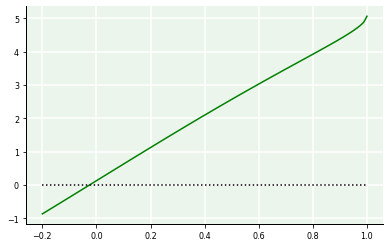

In [38]:
x = np.linspace(-0.2,1,100)
plot(x,-np.arccos(x) + 4*np.sin(x) + 1.7,'g',x,0*x,'k:');

- Uma vez que a raiz é única, basta aplicar o método que construímos à função desejada.

In [39]:
xm = bissecao('-arccos(x) + 4*sin(x) + 1.7',-0.2,0.2,1e-9,30)

+----+-------------+-------------+---------+---------+---------+--------+--------------+
| i  |      xm     |    f(xm)    |    a    |    b    |   f(a)  |  f(b)  |      EA      |
+----+-------------+-------------+---------+---------+---------+--------+--------------+
| 1  |     0.0     |  0.12920367 |   -0.2  |   0.2   | -0.8668 | 1.1252 | 4.000000e-01 |
| 2  |     -0.1    | -0.37029741 |   -0.2  |   0.0   | -0.8668 | 0.1292 | 2.000000e-01 |
| 3  |    -0.05    | -0.12073386 |   -0.1  |   0.0   | -0.3703 | 0.1292 | 1.000000e-01 |
| 4  |    -0.025   |  0.00421148 |  -0.05  |   0.0   | -0.1207 | 0.1292 | 5.000000e-02 |
| 5  |   -0.0375   | -0.05826997 |  -0.05  |  -0.025 | -0.1207 | 0.0042 | 2.500000e-02 |
| 6  |   -0.03125  | -0.02703107 | -0.0375 |  -0.025 | -0.0583 | 0.0042 | 1.250000e-02 |
| 7  |  -0.028125  | -0.01141021 | -0.0312 |  -0.025 |  -0.027 | 0.0042 | 6.250000e-03 |
| 8  |  -0.0265625 | -0.00359946 | -0.0281 |  -0.025 | -0.0114 | 0.0042 | 3.125000e-03 |
| 9  | -0.02578125 | 

- A raiz aproximada $x^{*}$, tal que para $f(x^{*}) = 0$ no intervalo-alvo é mostrada na última linha da tabela. Isto é,

In [40]:
# raiz aproximada
xm

-0.025842459872364998

**Exemplo:** Resolva o problema $h(z) = 0$, para $h(z) = -z(1-2z)^{-1} - \text{tan}(z+1)$, no intervalo $[1,8]$ e $\epsilon = 10^{-5}$.

- Primeiramente, façamos uma análise gráfica para verificar o comportamento da função.

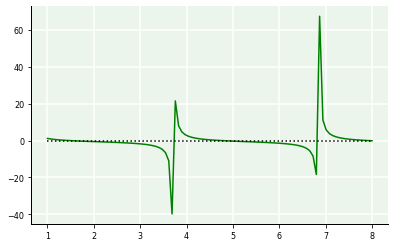

In [41]:
z = np.linspace(1,8,100)
plot(z,z/(1 - 2*z) - np.tan(z+1),'g',z,0*z,'k:');

- Neste caso, a função apresenta sensibilidades e mais de uma raiz no intervalo dado. Vamos buscar a raiz que está no subintervalo $[4,6]$. Para tanto, vamos deamplificar a plotagem.

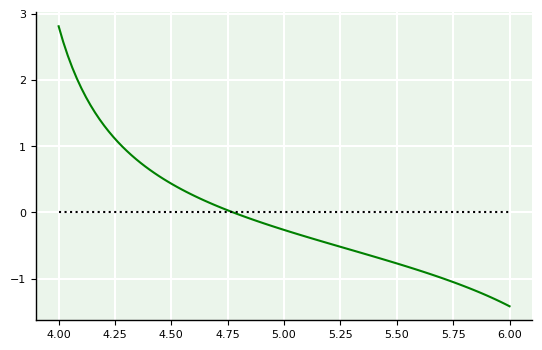

In [20]:
z = np.linspace(4,6,100)
plot(z,z/(1 - 2*z) - np.tan(z+1),'g',z,0*z,'k:');

- Uma vez que a raiz é única, basta aplicar o método que construímos à função desejada.

In [42]:
zm = bissecao('z/(1 - 2*z) - tan(z+1)',4,6,1e-5,20)

+----+------------+-------------+--------+--------+--------+---------+--------------+
| i  |     xm     |    f(xm)    |   a    |   b    |  f(a)  |   f(b)  |      EA      |
+----+------------+-------------+--------+--------+--------+---------+--------------+
| 1  |    5.0     | -0.26454936 |   4    |   6    | 2.8091 | -1.4169 | 2.000000e+00 |
| 2  |    4.5     |  0.43308405 |   4    |  5.0   | 2.8091 | -0.2645 | 1.000000e+00 |
| 3  |    4.75    |  0.03138032 |  4.5   |  5.0   | 0.4331 | -0.2645 | 5.000000e-01 |
| 4  |   4.875    | -0.12466745 |  4.75  |  5.0   | 0.0314 | -0.2645 | 2.500000e-01 |
| 5  |   4.8125   | -0.04914268 |  4.75  | 4.875  | 0.0314 | -0.1247 | 1.250000e-01 |
| 6  |  4.78125   | -0.00957612 |  4.75  | 4.8125 | 0.0314 | -0.0491 | 6.250000e-02 |
| 7  |  4.765625  |  0.01071879 |  4.75  | 4.7812 | 0.0314 | -0.0096 | 3.125000e-02 |
| 8  | 4.7734375  |  0.00052675 | 4.7656 | 4.7812 | 0.0107 | -0.0096 | 1.562500e-02 |
| 9  | 4.77734375 | -0.00453568 | 4.7734 | 4.7812 | 0.

- A raiz aproximada $z^{*}$, tal que para $h(z^{*}) = 0$ é mostrada na última linha da tabela. Isto é,

In [22]:
# raiz aproximada
zm

4.773845672607422

Por fim, vamos aplicar nosso método da bisseção ao problema do paraquedista apresentado no capítulo introdutório para buscar o coeficiente de arrasto adequado para os parâmetros de projeto impostos. 

Primeiramente, definiremos uma função para retornar a equação particular.

In [43]:
def eq_paraq(tempo,massa,vel,grav):
    """ Define equação particular para cálculo de coeficiente de arrasto 
        em salto de paraquedista. (Ver introdução.)
        
        Parâmetros: 
        
            tempo: duração de salto até velocidade terminal [s]
            massa: massa do paraquedista [kg]
            vel: velocidade terminal desejada [m/s]
            grav: aceleração gravitacional ambiente [m/s**2]
        
        Retorno: 
        
            f: expressão numérica para equação particular
               do coeficiente de arrasto
                
    """
    
    # variáveis simbólicas    
    from sympy import symbols, exp, lambdify
    
    g,m,t,v,c = symbols('g,m,t,v,c')
    
    # expressão geral
    f = (g*m/c)*(1 - exp((-c/m)*t)) - v
    
    # expressão particular com valores substituídos convertidos para str
    fs = f.subs({'g':grav,'m':massa,'v':vel,'t':tempo})
    
    # expressão simbólica convertida para expessão numérica
    fn = lambdify(c,fs,"numpy")
    
    # imprime para 
    print(f'Equação particular: f(c) = {fs}')
    
    return (fs,fn)

Em seguida, inserimos valores de entrada para teste. 

In [49]:
# parâmetros de entrada
tempo, massa, vel, grav = 12, 70, 42, 9.81

# equação particular
fs,fn = eq_paraq(tempo,massa,vel,grav)

Equação particular: f(c) = -42 + 686.7*(1 - exp(-6*c/35))/c


O próximo passo realiza a análise gráfica para localização do intervalo de aproximação da raiz.

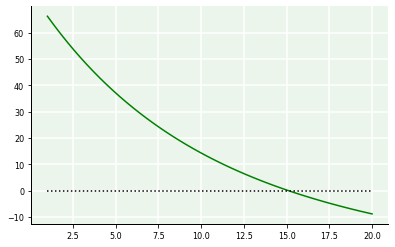

In [47]:
c = np.linspace(1,20)
plot(c,fn(c),'g',c,0*c,'k:');

Encerrando, chamamos a função.

In [50]:
cm = bissecao(str(fs),14,17.0,1e-4,20)

+----+-------------+-------------+---------+---------+--------+---------+--------------+
| i  |      xm     |    f(xm)    |    a    |    b    |  f(a)  |   f(b)  |      EA      |
+----+-------------+-------------+---------+---------+--------+---------+--------------+
| 1  |     15.5    | -0.80457281 |    14   |   17.0  | 2.6003 |  -3.797 | 3.000000e+00 |
| 2  |    14.75    |  0.84203047 |    14   |   15.5  | 2.6003 | -0.8046 | 1.500000e+00 |
| 3  |    15.125   |  0.00533671 |  14.75  |   15.5  | 0.842  | -0.8046 | 7.500000e-01 |
| 4  |   15.3125   | -0.40289836 |  15.125 |   15.5  | 0.0053 | -0.8046 | 3.750000e-01 |
| 5  |   15.21875  | -0.19960925 |  15.125 | 15.3125 | 0.0053 | -0.4029 | 1.875000e-01 |
| 6  |  15.171875  | -0.09734443 |  15.125 | 15.2188 | 0.0053 | -0.1996 | 9.375000e-02 |
| 7  |  15.1484375 | -0.04605603 |  15.125 | 15.1719 | 0.0053 | -0.0973 | 4.687500e-02 |
| 8  | 15.13671875 | -0.02037272 |  15.125 | 15.1484 | 0.0053 | -0.0461 | 2.343750e-02 |
| 9  | 15.13085938 | 

Como se vê, o coeficiente de arrasto aproximado para este caso é dado por:

In [27]:
cm

15.127426147460938

## Problemas propostos 

Para cada problema, dispondo de seu enunciado e informações, siga os 3 passos a seguir:

1. Faça a análise gráfica do modelo matemático do problema.
2. Defina o(s)intervalo(s) adequados(s) de localização.
3. Aplique o método da bisseção.

**Problema 1**. Uma reação química reversível $2A+B \iff C$ pode ser caracterizada pela relação de equilíbrio $K = \dfrac{c_c}{c_a^2c_b}$, onde $c_i$ representa a concentração do constituinte $i$. Suponha que:

- $x$ é o número de moles de $C$ que são produzidos
- a conservação da massa pode ser usada para reformular a relação de equilíbrio como

$$
K = \dfrac{(c_{c,0} + x)}{(c_{a,0} - 2x)^2 (c_{b,0} - x)},
$$ 

onde o subscrito $0$ designa a concentração inicial de cada constituinte. 

- $K = 0,016$, $c_{a,0} = 42$, $c_{b,0} = 28$ e $c_{c,0} = 4$.

Determine uma aproximação para $x$ com erro inferior a $10^{-5}$.

**Problema 2**. A potência de saída de uma célula solar varia com a tensão que ela fornece. A saída $V_{mp}$ para a qual a potência de saída é máxima é dada pela equação:

$$
\text{exp}(qV_{mp}/k_BT) \Big( 1 + \dfrac{qV_{mp}}{k_B T} \Big) = \text{exp}(qV_{oc}/k_B T)
$$

onde:

- $V_{oc}$ é a tensão de circuito aberto [V];
- $T$ é a temperatura [K];
- $q$ = 1.6022e-19 [C] é a carga de um elétron;
- $k$ = 1.3806e23 [J/K] é a constante de Boltzmann. 

Para $V_{oc}$ = 0.5 V e uma temperatura $T$ = 297 K, determine a tensão $V_{mp}$ na qual a potência de saída da célula solar é máxima.

In [28]:
plt.rcdefaults()